<a href="https://colab.research.google.com/github/Kaidus23/Skills-Assessment-2/blob/main/Word_Analyze.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Mount Google Drive

To access your files from Google Drive in this notebook, you can mount it using the following code:

```python
from google.colab import drive
drive.mount('/content/drive')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Import Libraries

In this step, we import the necessary libraries for data analysis, visualization, and text processing:


In [ ]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download NLTK stopwords (one-time setup)
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab') # Download the missing 'punkt_tab' data package



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

## Load the Dataset

In this step, we load the dataset from Google Drive and preview its contents.

```python
# Load the dataset
articles_df = pd.read_csv('/content/drive/MyDrive/Skills for Data scientists/articles.APOE.csv')

# Preview the dataset
print("Dataset Preview:")
print(articles_df.head())


## Load the Dataset

The following code loads the dataset from Google Drive and previews the first few rows.

In [ ]:
# Load the dataset
articles_df = pd.read_csv('/content/drive/MyDrive/Skills for Data scientists/articles.APOE.csv')

# Preview the dataset
print("Dataset Preview:")
print(articles_df.head())


Dataset Preview:
       PMID                                              Title  \
0  10545039  No evidence of association between apolipoprot...   
1  10558867  Association of the estrogen receptor alpha gen...   
2  10560469  Initial evaluation of suspected dementia. Aski...   
3  10563634  APOE-epsilon4 is associated with less frontal ...   
4  10570509  [Frequency of the APOE-4 allele in Alzheimer's...   

                                            Abstract       ISSN  \
0  The survival motor neuron (SMN) gene is presen...  0960-8966   
1  Alzheimer's disease (AD) is a multifactorial d...  0006-291X   
2  The initial clinical approach to suspected dem...  0032-5481   
3  To test the hypothesis that the e4 allele of A...  0028-3878   
4  Patients with late-onset Alzheimer's disease s...  0025-7753   

                                             Journal                 Location  \
0                      Neuromuscular disorders : NMD                (9) 372-5   
1  Biochemical and bi

## Clean Text Function

The following code defines a function to clean text by removing stopwords, punctuation, and numbers, then applies it to the "Title" and "Abstract" columns.


In [ ]:
# Define a function to clean text
def clean_text(text):
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(str(text).lower())  # Tokenize and convert to lowercase
    tokens = [word for word in tokens if word.isalpha()]  # Remove punctuation and numbers
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    return tokens

# Apply the function to the Title and Abstract columns
articles_df['Cleaned_Title'] = articles_df['Title'].apply(clean_text)
articles_df['Cleaned_Abstract'] = articles_df['Abstract'].apply(clean_text)

# Preview the cleaned text
print("Cleaned Titles and Abstracts:")
print(articles_df[['Cleaned_Title', 'Cleaned_Abstract']].head())


Cleaned Titles and Abstracts:
                                       Cleaned_Title  \
0  [evidence, association, apolipoprotein, e, gen...   
1  [association, estrogen, receptor, alpha, gene,...   
2  [initial, evaluation, suspected, dementia, ask...   
3  [associated, less, frontal, medial, temporal, ...   
4  [frequency, allele, alzheimer, disease, variat...   

                                    Cleaned_Abstract  
0  [survival, motor, neuron, smn, gene, present, ...  
1  [alzheimer, disease, ad, multifactorial, disor...  
2  [initial, clinical, approach, suspected, demen...  
3  [test, hypothesis, allele, apoe, associated, p...  
4  [patients, alzheimer, disease, show, higher, f...  


## Combine Words and Count Word Frequencies

This code combines all the words from the "Title" and "Abstract" columns, then counts the frequency of each word.


In [ ]:
# Combine words from all titles and abstracts
all_words = articles_df['Cleaned_Title'].sum() + articles_df['Cleaned_Abstract'].sum()

# Count the frequency of each word
word_counts = Counter(all_words)

# Display the 20 most common words
print("Most Common Words:")
print(word_counts.most_common(20))


Most Common Words:
[('apoe', 16324), ('ad', 10433), ('disease', 9588), ('risk', 7268), ('alzheimer', 6987), ('associated', 4849), ('apolipoprotein', 4830), ('cognitive', 4794), ('allele', 4706), ('genetic', 4456), ('study', 4264), ('e', 4254), ('patients', 4008), ('gene', 3916), ('association', 3848), ('genotype', 3523), ('brain', 3268), ('levels', 2781), ('p', 2765), ('age', 2705)]


## Extract Top 20 Words and Plot Bar Chart

This code extracts the 20 most common words and their frequencies, then visualizes the results in a bar chart.

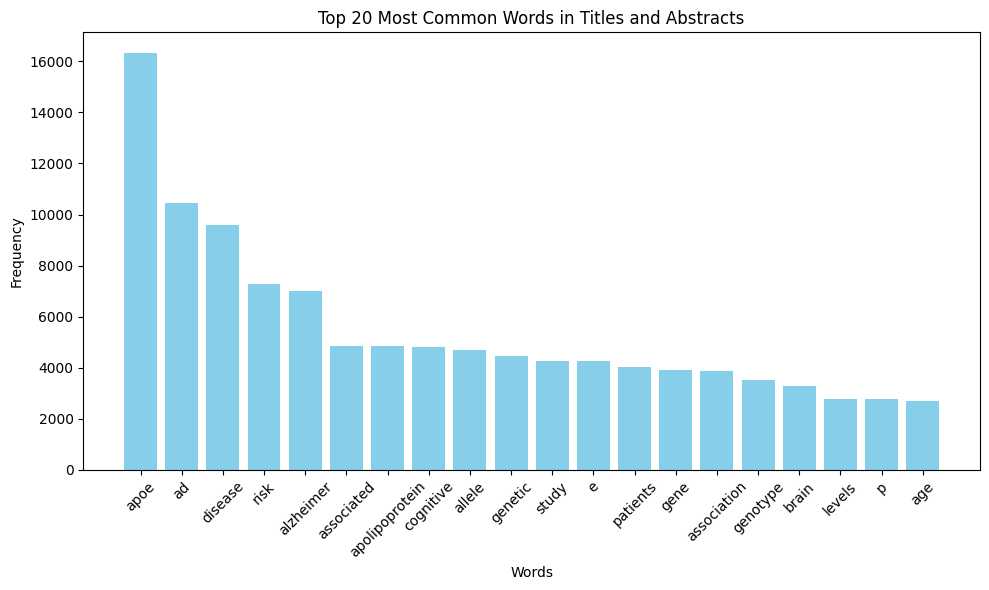

In [ ]:
# Extract the top 20 words and their counts
common_words = word_counts.most_common(20)
words, counts = zip(*common_words)

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(words, counts, color='skyblue')
plt.title("Top 20 Most Common Words in Titles and Abstracts")
plt.ylabel("Frequency")
plt.xlabel("Words")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Generate and Display Word Cloud

This code generates a word cloud to visualize the most frequently used terms in the dataset.


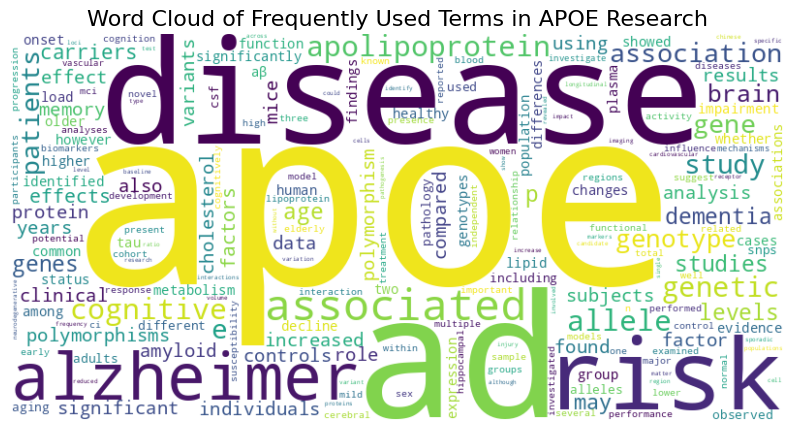

In [ ]:
# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axes
plt.title("Word Cloud of Frequently Used Terms in APOE Research", fontsize=16)
plt.show()


## Group by Year and Analyze Word Frequency

This code groups the dataset by year and analyzes the most common words in the abstracts for each year.

In [ ]:
# Group by year and analyze word frequency
yearly_trends = articles_df.groupby('Year')['Cleaned_Abstract'].sum()

# Count the most common words for each year
yearly_word_counts = {year: Counter(words) for year, words in yearly_trends.items()}

# Display the most common words for a specific year (example: 2020)
print("Most Common Words in 2020:")
print(yearly_word_counts.get(2020, {}).most_common(10))


Most Common Words in 2020:
[('apoe', 668), ('ad', 577), ('disease', 398), ('risk', 315), ('alzheimer', 298), ('cognitive', 265), ('genetic', 209), ('associated', 204), ('study', 195), ('brain', 183)]


## Define Keywords and Plot Keyword Trends Over Time

This code defines a set of keywords to track, counts their occurrences by year, and plots the trends over time.

```python
# Define keywords to track
keywords = ['alzheimer', 'lipids', 'apolipoprotein']

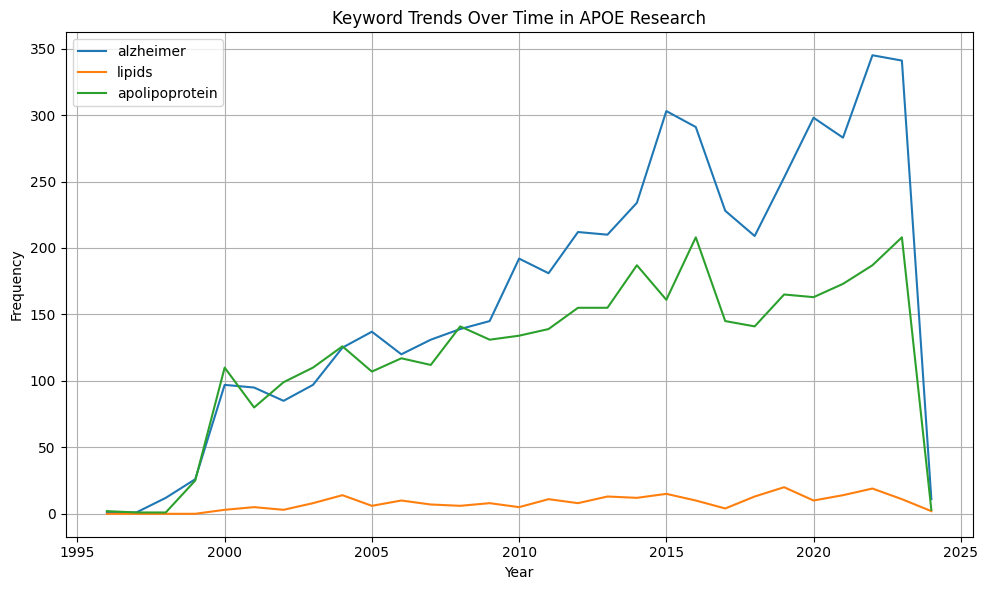

In [ ]:
# Define keywords to track
keywords = ['alzheimer', 'lipids', 'apolipoprotein']

# Count keyword occurrences by year
keyword_trends = {key: [] for key in keywords}
years = sorted(yearly_word_counts.keys())

for year in years:
    word_counts = yearly_word_counts[year]
    for key in keywords:
        keyword_trends[key].append(word_counts.get(key, 0))

# Plot the trends
plt.figure(figsize=(10, 6))
for key, counts in keyword_trends.items():
    plt.plot(years, counts, label=key)

plt.title("Keyword Trends Over Time in APOE Research")
plt.xlabel("Year")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Filter Data for the Last 5 Years and Identify Emerging Terms

This code filters the dataset for the last 5 years, combines the cleaned words, counts their frequencies, and displays the most common words.

```python
# Filter data for the last 5 years
recent_years = articles_df[articles_df['Year'] >= articles_df['Year'].max() - 5]

In [ ]:
# Filter data for the last 5 years
recent_years = articles_df[articles_df['Year'] >= articles_df['Year'].max() - 5]

# Combine words and count frequencies
recent_words = recent_years['Cleaned_Abstract'].sum()
recent_word_counts = Counter(recent_words)

# Display the most common recent words
print("Emerging Terms in Recent Years:")
print(recent_word_counts.most_common(20))


Emerging Terms in Recent Years:
[('apoe', 3673), ('ad', 2938), ('disease', 2226), ('risk', 1786), ('alzheimer', 1531), ('cognitive', 1349), ('associated', 1195), ('genetic', 1075), ('study', 999), ('brain', 959), ('apolipoprotein', 899), ('patients', 770), ('e', 766), ('age', 727), ('allele', 717), ('dementia', 700), ('gene', 657), ('studies', 647), ('association', 645), ('levels', 639)]


## Compare Word Counts from Earlier Years to Recent Years and Identify Emerging Words

This code compares word frequencies from the last 5 years to those from earlier years to identify emerging words.


In [ ]:
# Compare word counts from earlier years to recent years
past_years = articles_df[articles_df['Year'] < articles_df['Year'].max() - 5]
past_words = past_years['Cleaned_Abstract'].sum()
past_word_counts = Counter(past_words)

# Identify emerging words (words that appear more in recent years)
emerging_words = [(word, recent_word_counts[word]) for word in recent_word_counts if recent_word_counts[word] > 2 * past_word_counts.get(word, 0)]
emerging_words.sort(key=lambda x: x[1], reverse=True)

# Display emerging words
print("Emerging Words:")
print(emerging_words[:20])


Emerging Words:
[('microglia', 212), ('microglial', 123), ('prs', 113), ('pathologies', 102), ('unimpaired', 96), ('resilience', 76), ('rna', 67), ('cpf', 59), ('nfl', 56), ('degs', 49), ('biobank', 48), ('tauopathy', 45), ('myelin', 44), ('machine', 39), ('pluripotent', 39), ('gut', 38), ('suvr', 34), ('microbiota', 34), ('autophagy', 32), ('skin', 31)]


## Choose Your Research Topic Based on Emerging Keywords

This code prints the emerging research topics by identifying keywords that are frequent now but were rare in the past.

In [ ]:
# TO choose my research topic

# Print the emerging words, which are frequent now but rare before
print("Emerging Research Topics Based on Keywords: ")
for word, count in emerging_words[:10]:  # Adjust number for top emerging words
    print(f"{word}: {count} occurrences")


Emerging Research Topics Based on Keywords: 
microglia: 212 occurrences
microglial: 123 occurrences
prs: 113 occurrences
pathologies: 102 occurrences
unimpaired: 96 occurrences
resilience: 76 occurrences
rna: 67 occurrences
cpf: 59 occurrences
nfl: 56 occurrences
degs: 49 occurrences


## Define Research Themes Based on Keywords and Count Their Occurrences

This code defines key research themes, counts the occurrences of related keywords, and prints the theme priorities based on recent research trends.

```python
# Define research themes based on keywords
research_themes = {
    'Genetics': ['genetic', 'mutation', 'risk', 'gene'],
    'Alzheimer\'s Disease': ['alzheimer', 'dementia', 'memory'],
    'Lipids & Metabolism': ['lipid', 'cholesterol', 'metabolism'],
    'Clinical Trials': ['clinical', 'trial', 'therapy'],
    'Neuroinflammation': ['neuroinflammation', 'neurodegeneration']

In [ ]:
# Define research themes based on keywords
research_themes = {
    'Genetics': ['genetic', 'mutation', 'risk', 'gene'],
    'Alzheimer\'s Disease': ['alzheimer', 'dementia', 'memory'],
    'Lipids & Metabolism': ['lipid', 'cholesterol', 'metabolism'],
    'Clinical Trials': ['clinical', 'trial', 'therapy'],
    'Neuroinflammation': ['neuroinflammation', 'neurodegeneration']
}

# Count occurrences of each theme in recent years
theme_counts = {theme: sum([recent_word_counts[word] for word in words]) for theme, words in research_themes.items()}
print("Research Theme Priorities (Recent Years):")
for theme, count in theme_counts.items():
    print(f"{theme}: {count} occurrences")


Research Theme Priorities (Recent Years):
Genetics: 3584 occurrences
Alzheimer's Disease: 2594 occurrences
Lipids & Metabolism: 858 occurrences
Clinical Trials: 571 occurrences
Neuroinflammation: 230 occurrences


## Plot Trends for Each Keyword/Theme Over Time

This code plots the trends of each research theme over time based on the occurrence of related keywords in the abstracts.

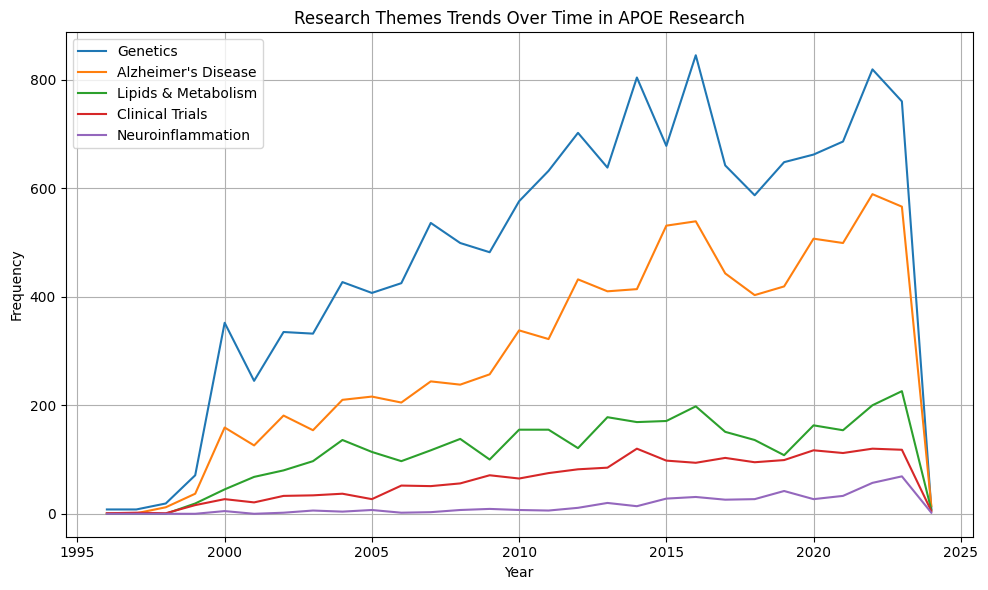

In [ ]:
# Plot trends for each keyword/theme
plt.figure(figsize=(10, 6))
for theme, words in research_themes.items():
    trend = [sum([yearly_word_counts[year].get(word, 0) for word in words]) for year in years]
    plt.plot(years, trend, label=theme)

plt.title("Research Themes Trends Over Time in APOE Research")
plt.xlabel("Year")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Generate a summary of recommendations
recommendations = sorted(theme_counts.items(), key=lambda x: x[1], reverse=True)
print("Research Topics to Prioritize:")
for theme, count in recommendations[:5]:  # Top 5 themes
    print(f"{theme}: {count} occurrences")


Research Topics to Prioritize:
Genetics: 3584 occurrences
Alzheimer's Disease: 2594 occurrences
Lipids & Metabolism: 858 occurrences
Clinical Trials: 571 occurrences
Neuroinflammation: 230 occurrences
